In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import Input, Model, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/vns_cervical_rat_data.csv')

# Extract relevant columns
input_cols = ['pulse_width', 'frequency', 'amplitude']
latent_cols = ['AB_fibers_activated', 'C_fibers_activated']

X = data[input_cols].values
y_latent = data[latent_cols].values

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train_latent, y_test_latent = train_test_split(X, y_latent, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
latent_dim = 2  # Size of the latent space (AB_fibers_activated and C_fibers_activated)


In [2]:

# Encoder
input_layer = Input(shape=(input_dim,))
encoder_layer1 = layers.Dense(64, activation='relu')(input_layer)
encoder_layer1 = layers.Dropout(0.2)(encoder_layer1)
encoder_layer2 = layers.Dense(32, activation='relu')(encoder_layer1)
encoder_layer2 = layers.Dropout(0.2)(encoder_layer2)
latent_layer = layers.Dense(latent_dim, activation='relu')(encoder_layer2)

# Decoder
decoder_layer1 = layers.Dense(32, activation='relu')(latent_layer)
decoder_layer1 = layers.Dropout(0.2)(decoder_layer1)
decoder_layer2 = layers.Dense(64, activation='relu')(decoder_layer1)
decoder_layer2 = layers.Dropout(0.2)(decoder_layer2)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Latent space model for the encoder
encoder = Model(inputs=input_layer, outputs=latent_layer)

decoder = Model(inputs=latent_layer, outputs=output_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder(encoder(input_layer)))


Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.9052 - val_loss: 0.7446
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7505 - val_loss: 0.6972
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6837 - val_loss: 0.6494
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6689 - val_loss: 0.6475
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6582 - val_loss: 0.6473
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6609 - val_loss: 0.6433
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6627 - val_loss: 0.6408
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6600 - val_loss: 0.6386
Epoch 9/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6503 - val_loss: 0.6368
Epoch 10/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6578 - val_loss: 0.6353
Epoch 11/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6601 - val_loss: 0.6337
Epoch 12/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

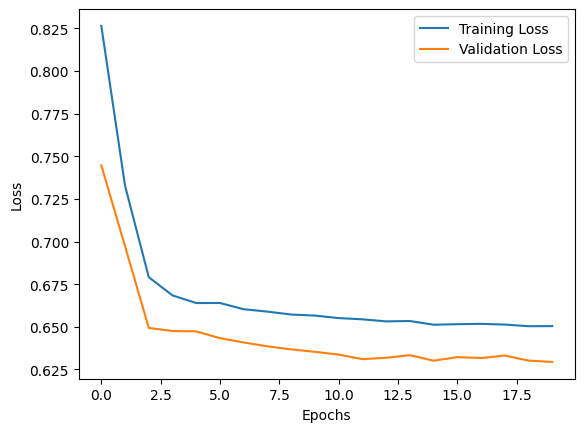

In [3]:
# Compile the model
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=16, validation_split=0.2)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:

# Generate latent space representation for a new combination of AB_fibers_activated and C_fibers_activated
def generate_latent_space_representation(AB_activated, C_activated):
    latent_space = np.array([[AB_activated, C_activated]])
    return latent_space

# Example: Generating input parameters for new AB_fibers_activated and C_fibers_activated
new_AB_activated = 0.5  # Example value
new_C_activated = 0.3   # Example value

latent_representation = generate_latent_space_representation(new_AB_activated, new_C_activated)

# Decode the latent representation
decoded_input_parameters = decoder.predict(latent_representation)

print("Generated input parameters:", decoded_input_parameters)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
Generated input parameters: [[0.9651329  0.00910633 0.71622986]]
